# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

**Linear regression** is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. **Logistic regression** is used to model binary outcomes whereas **Poisson** regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds **noise** to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The **residuals**, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

* `note:` Expected Value (mean value) of $\mathbf{Z}$ is given by $E(\mathbf{Z}) := \int_{\Omega} {\mathbf{Z} dP}$  (SDE p.14)

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by **minimizing the squared residuals**: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

`Component-wise derivation:`

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} 
\mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we **need** $X^T X$ **to be invertible**. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

`(Extra) Vectorized derivation:`

$\mathscr{L}  
= \epsilon^{2} 
= \lVert \mathbf{y}-\hat{\mathbf{y}} \rVert^{2} = \left\Vert \mathbf{y}- X \hat{\boldsymbol{\beta}} \right\Vert^{2}$

Gradient of $\mathscr{L}$ wrt $\hat{\boldsymbol{\beta}}$ is then:

$\nabla \mathscr{L} = 
\left[ -X \right]^{T}
\left[ 2 \left( \mathbf{y}- X \hat{\boldsymbol{\beta}} \right) \right]
= -2 X^{T} \mathbf{y} + 2 X^{T} X \hat{\boldsymbol{\beta}}
$

So as $\nabla \mathscr{L} \rightarrow \mathbf{0}$, we have: 

$\hat{\boldsymbol{\beta}} = \left( X^{T} X \right)^{-1} X^{T} \mathbf{y}$

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.

**UPDATE:** data set is deprecated (ethical reasons)


In [2]:
from sklearn.datasets import load_boston
import pandas as pd

# deprecated (ethical issues with dataset)(no longer available from sklearn)
# boston = load_boston()

data_url = "http://lib.stat.cmu.edu/datasets/boston"
#raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
#data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
#target = raw_df.values[1::2, 2]

boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

In [3]:
# columns 11 to 13 run onto the next line
cols_11_13 = boston.values[1::2, 0:3]

In [4]:
boston = boston.values[0::2, :]
boston = np.concatenate((boston, cols_11_13), axis=1)

In [5]:
import re

column_name_desc = pd.read_csv(data_url, sep='\t', skiprows=7, nrows=14, header=None)
column_names = column_name_desc[0].str.extract(r'(\w+)').to_numpy().flatten()
#column_desc = column_name_desc[0].str.extract(r'(\w+\s?)+$').to_numpy().flatten()
print(column_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT' 'MEDV']


In [6]:
for i in range(column_name_desc.size):
    print(column_name_desc.iloc[i][0])

 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's


**comment:** this is an unethical study... (year: 1978)

Now let's explore the data set. 

In [7]:
bos = pd.DataFrame(boston, columns=column_names)
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# Remove the unethical column B
bos = bos.drop(columns=['B'], axis=1)

In [9]:
# Rename the 'MEDV' column to 'PRICE'
# where 'MEDV' represents the median value in $1000s
# This will be the target value for our model
bos = bos.rename(columns={'MEDV': 'PRICE'})
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [10]:
bos.describe().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.885,45.025,2.100,4.000,279.000,17.400,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.624,94.075,5.188,24.000,666.000,20.200,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.126,24.000,711.000,22.000,37.970,50.000


In [11]:
# Check for missing values 
bos.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
PRICE      0
dtype: int64

### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

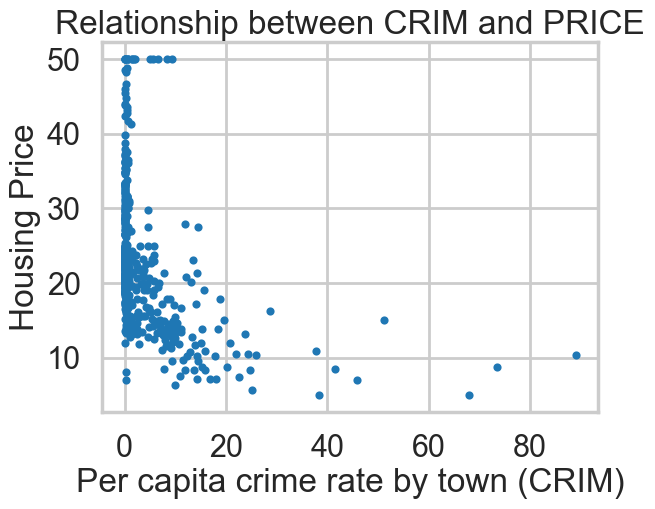

In [12]:
plt.scatter(bos.CRIM, bos.PRICE, s=15)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and PRICE") ;

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

**your turn: describe relationship**

`CRIM values:` 
* not normally distributed, and heavily skewed right 
* there are many large outliers on the right side, and they strongly influence the std. deviation

`PRICE values:`
* has some outliers with large prices
* also a bit rightly skewed 

`CRIM vs. PRICE:`
* Ignoring the outliers, there may be a negative linear relationship between the two variables (i.e. as crime rate decrease, house price increases)

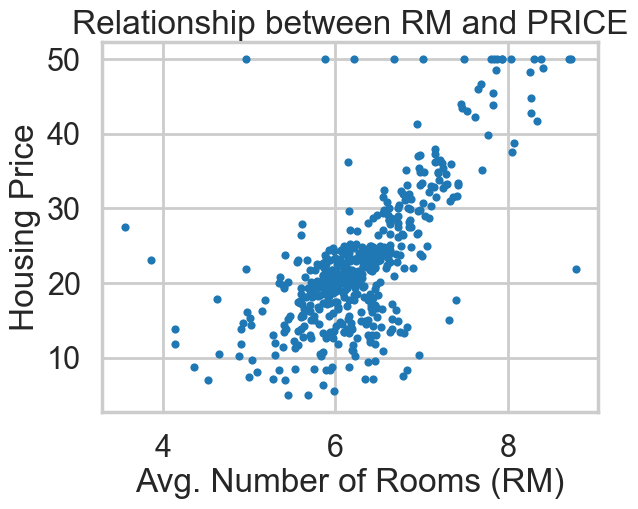

In [13]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE, s=15)
plt.xlabel('Avg. Number of Rooms (RM)')
plt.ylabel('Housing Price')
plt.title('Relationship between RM and PRICE') ;

* It appears that there is a positive linear relationship between RM and PRICE, 
where the house price increases as the number of rooms it has increases. 
* There are some outliers, most notable where the number of rooms has doesn't really affect the house price for some house priced at $50,000 (PRICE = 50). 

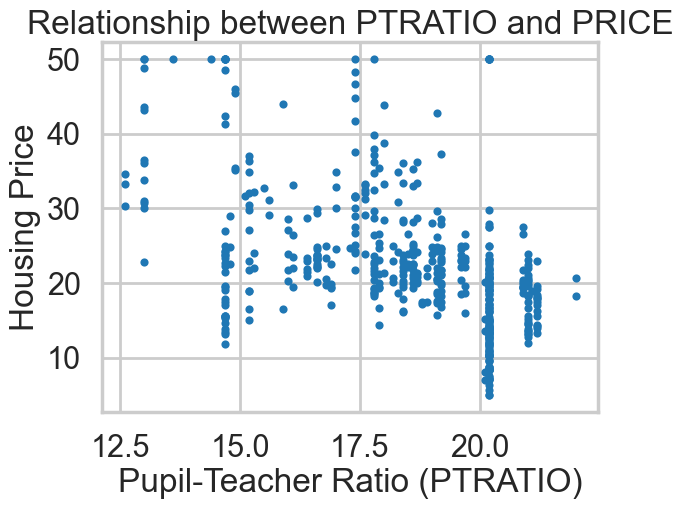

In [14]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE, s=15)
plt.xlabel('Pupil-Teacher Ratio (PTRATIO)')
plt.ylabel('Housing Price')
plt.title('Relationship between PTRATIO and PRICE') ;

* There may be a negative linear relationship between PTRATIO and PRICE

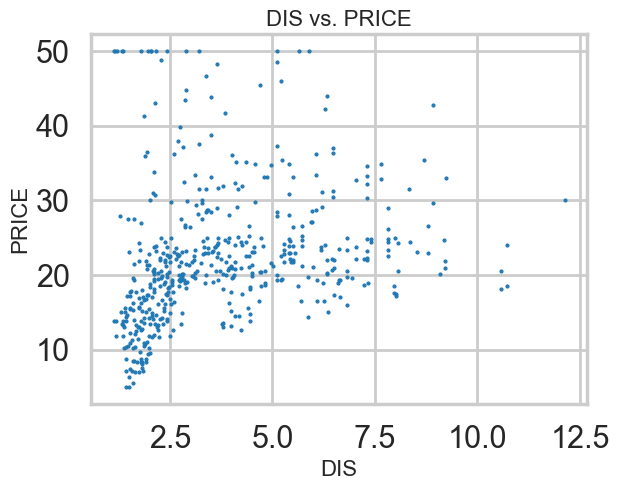

In [15]:
# your turn: create some other scatter plots
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

plt.scatter(bos.DIS, bos.PRICE, s=1)
plt.xlabel('DIS')
plt.ylabel('PRICE')
plt.title('DIS vs. PRICE') ;

Not quite a linear relationship

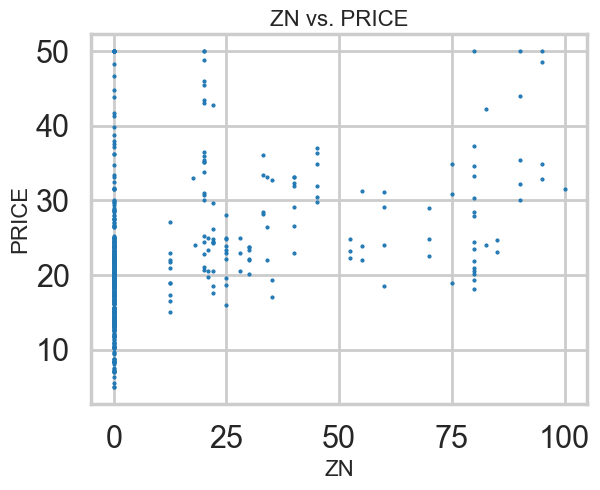

In [16]:
plt.scatter(bos.ZN, bos.PRICE, s=1)
plt.xlabel('ZN')
plt.ylabel('PRICE')
plt.title('ZN vs. PRICE') ;

ZN = proportion of residential land zoned for lots over 25,000 sq.ft.

It appears there may be a positive linear relationship b/w ZN and PRICE. 
Note that there are many values where there are no lots over 25,000 sq. ft. 

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

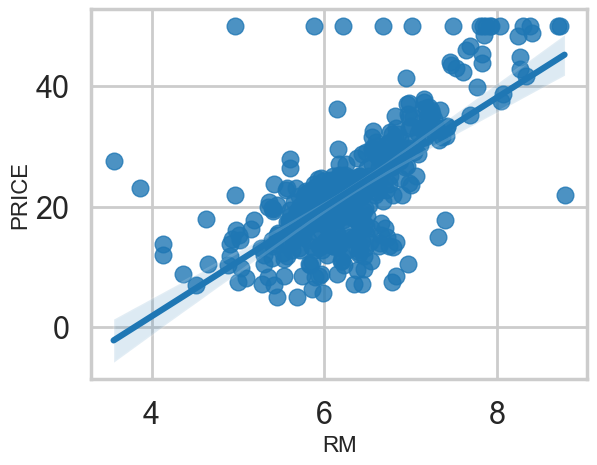

In [17]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True) ;

### Histograms
***


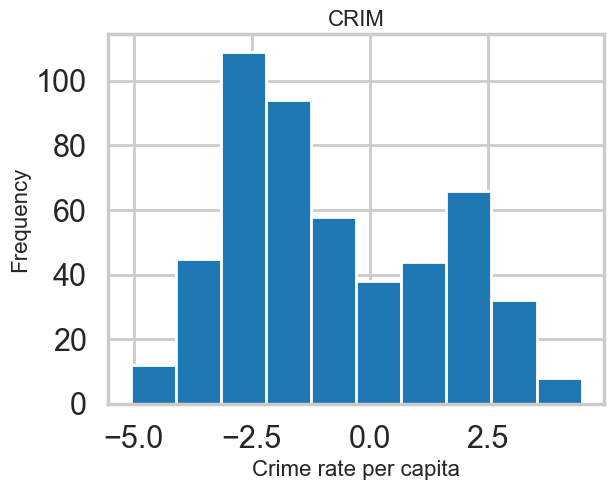

In [18]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show() ;

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

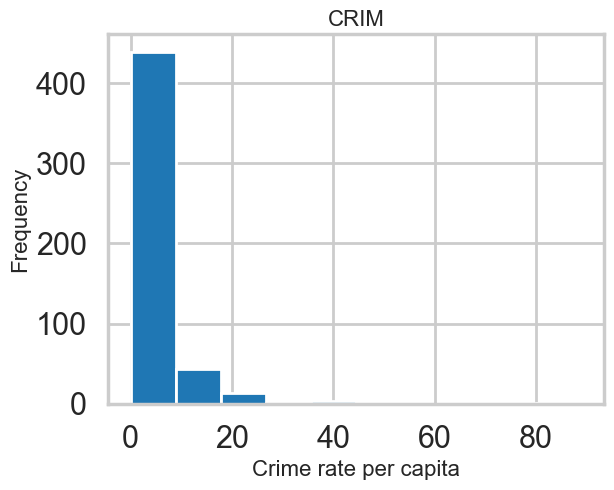

In [19]:
#your turn

plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show() ;

By taking the log of the CRIM values we are able to better visualize the distribution of the data, 
since the CRIM values vary greatly (from 0 to 80) and is heavily right skewed with large outliers. 
Looking at the log tranformed data, we can see that the data is somewhat bimodal. 

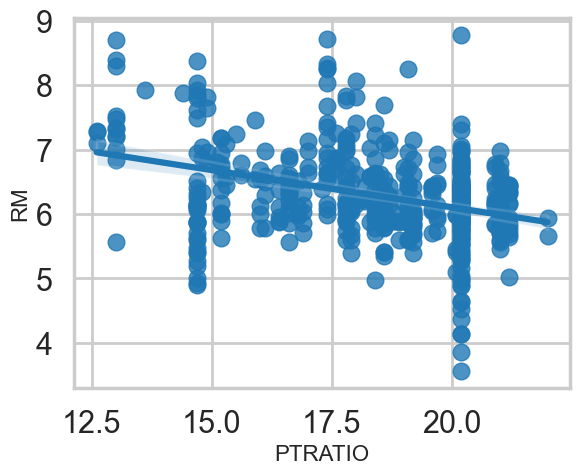

In [20]:
# Looking for correlations in predictors

# Plot the scatterplot for *RM* and *PTRATIO* against each other
sns.regplot(y="RM", x="PTRATIO", data=bos, fit_reg = True) ;

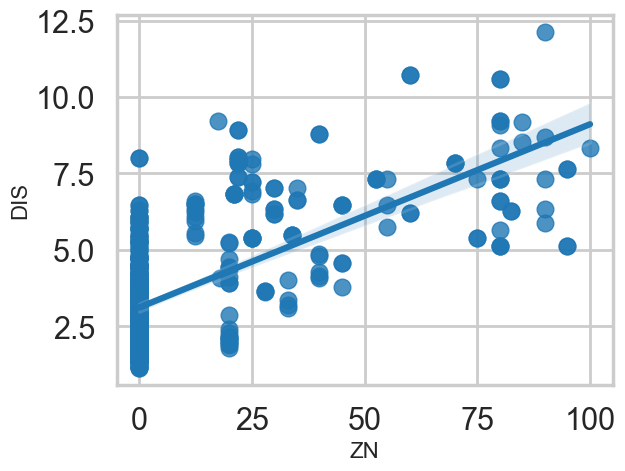

In [21]:
# Plot the scatterplot for *ZN* and *DIS* against each other
sns.regplot(y="DIS", x="ZN", data=bos, fit_reg = True) ;

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called **ordinary least-squares (OLS)**. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [22]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [23]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           2.49e-74
Time:                        16:41:23   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the **p-value** (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statistically significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The **confidence interval** $( [2.5\%, 97.5\%] : [8.279, 9.925] )$ gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls, you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is done like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as **categorical** with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a **ceiling effect**, we should probably look into that. Also, for large values of $Y$ we get **underpredictions**, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

Text(0.5, 1.0, 'Predicted vs. Actual PRICE')

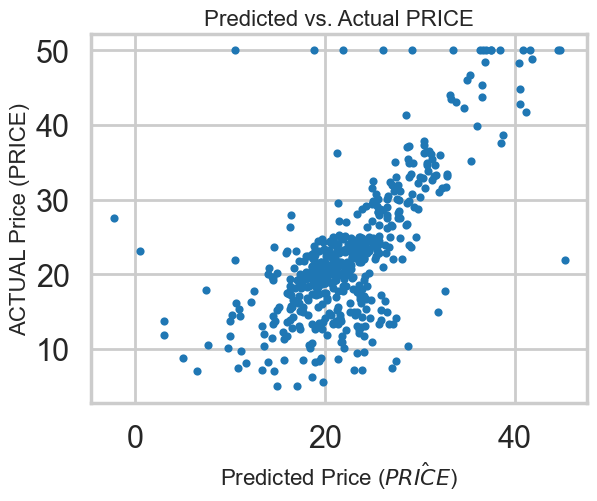

In [24]:
# your turn
plt.scatter(m.fittedvalues, bos.PRICE, s=15)
plt.ylabel('ACTUAL Price (PRICE)')
plt.xlabel('Predicted Price ($\hat{PRICE}$)')
plt.title('Predicted vs. Actual PRICE')

If our Predicted Prices we obtained from the linear model were a good fit, we would observe a points close to the line $y=x$. 
However in the plot above, we can see that there are some outliers, most notably the values at the `ceiling`, where the model (formed using RM values) does not accurately predict the PRICES for the houses with PRICE=50. 

### Fitting Linear Regression using `sklearn`


In [25]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [26]:
# Look inside lm object
# lm.<tab>

 Output | Description 
 --- | --- 
 `lm.coef_` | Estimated coefficients
 `lm.intercept_` | Estimated intercept

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [27]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression()

In [28]:
# coefficients for each predictor
cols = column_names[column_names != 'B']
pd.DataFrame(lm.coef_,cols[0:-1]).T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,-0.121389,0.046963,0.013468,2.839993,-18.758022,3.658119,0.003611,-1.490754,0.289405,-0.012682,-0.937533,-0.552019


In [29]:
# y-intercept of model
lm.intercept_

41.617270175954665

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


`your turn:`

**Intercept term:**
* We can change the model to not include an intercept term by setting 'fit_intercept = False' when creating our LinearRegression object lm
* In situations where it does not make sense to have data values of $\mathbf{x} = \mathbf{0}$ map to predicted values $y=0$, we should set the intercept term to zero (i.e. intercept is at the origin). 
    * ex. it does not make sense to have $x=0$ hours of working map to $y=\$20$ for an hourly-paid job 

**i.i.d. Residuals:**
* If the residuals $\epsilon$ of the model prediction are normally distributed, that is generally sufficient enough for us to the assume $\epsilon$ are i.i.d.
    * [discussion](https://www.quora.com/A-linear-regression-requires-residuals-to-be-normally-distributed-Why-do-we-need-this-assumption-What-will-happen-if-this-assumption-does-not-satisfy)

**Normal Distibution:** 
* It is not required in OLS for $\mathbf{y}$ to be normally distributed (i.e. False).
    * For instance, a bimodal distribution for the dependent variable can still provide a decent fit for the model
    * However, we should be wary of strongly skewed distributions, as they can create bias. In this case, we can try normalizing the values. 
    * [better explanation](https://www.statsimprove.com/en/linear-regression-should-dependent-and-independent-variables-be-distributed-normally/#:~:text=The%20answer%20is%20no%3A%20the,useless%20trying%20to%20normalize%20everything.)

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [30]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 41.617270175954665


In [31]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 12


In [32]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.121389
1,ZN,0.046963
2,INDUS,0.013468
3,CHAS,2.839993
4,NOX,-18.758022
5,RM,3.658119
6,AGE,0.003611
7,DIS,-1.490754
8,RAD,0.289405
9,TAX,-0.012682


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [33]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.03373805, 25.05683368, 30.60818602, 28.67717948, 27.928791  ])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

Text(0, 0.5, 'Frequency')

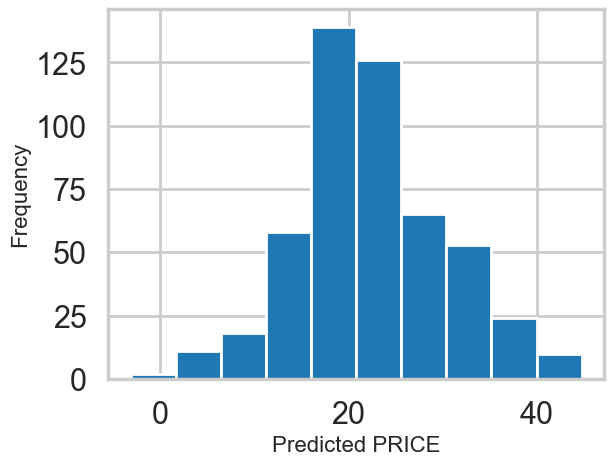

In [34]:
# your turn
# Predicted PRICE histogram
plt.hist(lm.predict(X))
plt.xlabel("Predicted PRICE")
plt.ylabel("Frequency")

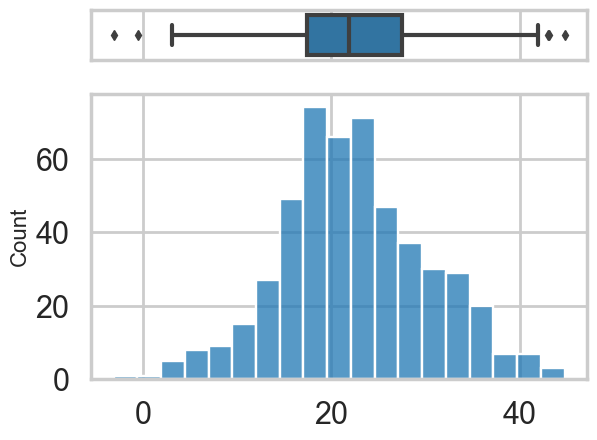

In [35]:
# Predicted PRICE histogram and boxplot 

# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(x=lm.predict(X), ax=ax_box)
sns.histplot(x=lm.predict(X), ax=ax_hist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

From the histogram above, we can see that the distribution is fairly normal (slightly skewed) and centered around $\hat{y}=25$.
From the boxplot, we can that there some outlier on both ends. There are even some negative values, which does not make sense for values of 'PRICE'.
This can be due to the data having bias, and thus making the y-intercept negative. Maybe it can be due to some of the predictors not having a `linear` relationship with PRICE (recall our 'DIS' vs. 'PRICE' scatterplot). Or maybe the outliers can be special cases. We should observe the residual values to help us decide what to do about the outliers. 

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [36]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11349.418808381904


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

constant $\bar{y}$ is the sample mean of the dependent variable values $y$ 
(or a vector if out target variable is multidimensional, $\bar{\mathbf{y}}$)

In [37]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE))**2))

31366.87660663759


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the `number of observations`, $K$ is the `number of variables`, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The `mean squared errors` are just the *averages* of the sum-of-squares errors over their respective *degrees of freedom*.

$$MSR = \frac{ESS}{K}$$

$$MSE = \frac{RSS}{N-K-1}$$

**Remember:** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, `E = explained and R = residual`. In other resources, `E = error and R = regression` (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just *fit* is even **statistically significant**. We use an $F$-test for this. The `null hypothesis` is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

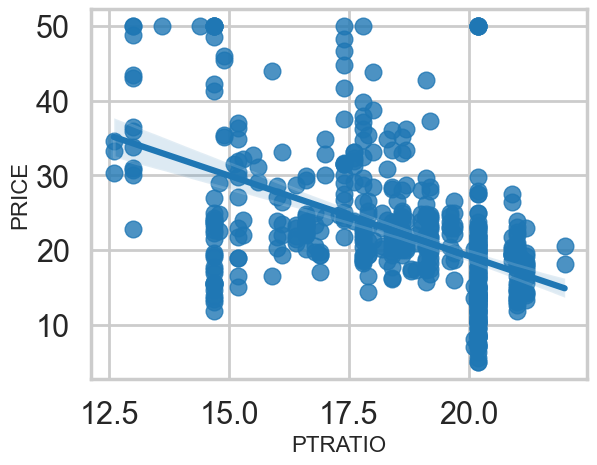

In [38]:
# Linear Regression model using PTRATIO
x = bos.PTRATIO.values.reshape(-1, 1)
lm.fit(x, bos.PRICE)

# scatterplot 
sns.regplot(y='PRICE', x='PTRATIO', data=bos, fit_reg = True) ;

In [39]:
# Intercept and Coefficient
print('Estimated feature coefficient: {}'.format(lm.coef_))
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated feature coefficient: [-2.1571753]
Estimated intercept coefficient: 62.34462747483259


From the intercept and feature coefficient, we can see that PTRATIO and PRICE have a negative correlation. 
Intuitively, this makes sense as smaller class room sizes indicate areas with more school funding (i.e. higher socioeconomic status) 

In [40]:
# RSS (residual sum-of-squares)
RSS = sum( ( bos.PRICE-lm.predict(x) )**2 )

# ESS (explained sum-of-squares)
ESS = sum( ( lm.predict(x)-np.mean(bos.PRICE) )**2 )

# TSS (total sum-of-squares)
TSS = RSS + ESS

# R^2 value (coefficient of determination)
R2 = ESS/TSS

# print(pd.DataFrame(['RSS', 'ESS', 'TSS', 'R2'],[RSS, ESS, TSS, R2]))
print(pd.DataFrame([RSS, ESS, TSS, R2], ['RSS', 'ESS', 'TSS', 'R2']).T)

            RSS           ESS           TSS        R2
0  31702.013207  11014.282208  42716.295415  0.257847


With $R^{2} = 0.26$, this tells us that the model based on 'PTRATIO' values does not predict the house 'PRICE' well. 
It only is able to predict 26% of the variance in the PRICE values.

`note:` $R^{2}$ is a measure of goodness of fit. It is the proportion of variance in the dependent variable that is explained by the model
* [source](https://www.scribbr.com/statistics/coefficient-of-determination/#:~:text=The%20coefficient%20of%20determination%20(R%C2%B2)%20is%20a%20number%20between%200,predicted%20by%20the%20statistical%20model.)

In [41]:
# F-statistic
N = x.shape[0] # number of observations
K = x.shape[1] # number of variables
F = (R2/(1-R2))*((N-K-1)/K)

print('F-statistic: ', np.round(F,2))

F-statistic:  175.11


In [42]:
# F-critical 
# https://www.statology.org/f-critical-value-python/
import scipy.stats

# q: significance level, dfn: numerator degrees of freedom, dfd: denominator dof
Fcrit = scipy.stats.f.ppf(q=1-.05, dfn=K, dfd=N-K-1)

print('F-critical: ', np.round(Fcrit,2))

F-critical:  3.86


In [43]:
# Using statsmodels package
m = ols('PRICE ~ PTRATIO',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           1.61e-34
Time:                        16:41:25   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

Looking at the *F-statistic* = 175.11 alone doesn't tell us much, but if we compare it to the *F-critical* = 3.86, we can gauge the statistical significance of our model. 
* If F-stat > F-crit, then we can reject the *null hypothesis* (i.e. a model where $\beta_{i} = 0, \forall i > 0$).
* In the above model, we have F-stat > F-crit, so we can ignore the null hypothesis

We can also consider the *p-value = Prob(F-statistic)* to help us examine our model. 
* If p-value is close to zero, we can reject the null-hypothesis. 

`extra notes:` 
* F-statistic tells us whether the feature variables are able to explain (i.e. predict) the the target variable
* [source 1](https://medium.com/analytics-vidhya/f-statistic-understanding-model-significance-using-python-c1371980b796)
* [source 2](https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/)

`F-statistic and t-statistic:`
* $\text{F-statistic} = (\text{t-statistic})^{2}$ for simple linear regression models (i.e. 1 feature)
    * F-statistic = 175.1
    * t-statistic(PTRATIO) = -13.233
* F-statistic gives the overall significance of the model features
* t-statistics evaluate just one term at a time

* [source 1](https://www.mathworks.com/help/stats/f-statistic-and-t-statistic.html)
* [source 2](https://statisticsbyjim.com/regression/interpret-f-test-overall-significance-regression/)


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [44]:
# your turn

# Linear Regression model using CRIM, RM, & PTRATIO
X = bos[['CRIM', 'RM', 'PTRATIO']]
lm.fit(X, bos.PRICE)

LinearRegression()

In [45]:
N = X.shape[0] # number of observations
K = X.shape[1] # number of variables

RSS = sum( ( bos.PRICE-lm.predict(X) )**2 )          # RSS (residual sum-of-squares)
ESS = sum( ( lm.predict(X)-np.mean(bos.PRICE) )**2 ) # ESS (explained sum-of-squares)
TSS = RSS + ESS                                      # TSS (total sum-of-squares)

# R^2 value (coefficient of determination)
R2 = ESS/TSS 

# F-statistic value
Fstat = (R2/(1-R2))*((N-K-1)/K)

# F-critical value
Fcrit = scipy.stats.f.ppf(q=1-.05, dfn=K, dfd=N-K-1)

print(pd.DataFrame([RSS, ESS, TSS, R2, Fstat, Fcrit], ['RSS', 'ESS', 'TSS', 'R2', 'F-stat', 'F-crit']).round(2).T)

        RSS       ESS      TSS    R2  F-stat  F-crit
0  17328.24  25388.06  42716.3  0.59  245.16    2.62


In [46]:
# using statsmodels package

# add a constant term (fit the OLS model with intercept on features)
X = sm.add_constant(X) 

m = sm.OLS(bos.PRICE,X).fit()
print(m.summary())
# https://www.datarobot.com/blog/multiple-regression-using-statsmodels/

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           6.15e-98
Time:                        16:41:25   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3707      4.034     -0.836      0.4

* F-statistic = 245.2
* F-critical = 2.62
    * With F-stat > F-crit, we can say that the model is statistically significant (i.e. we can use the feature vars to predict the target)
* $\rm{R}^{2}$ = 0.594
    * The model is able to predict 59% of the variance in the PRICE values, which is not great, but much better than when 'PTRATIO' was the only feature. 

`Evaluating feature coefficients:` 
$
\begin{align*}
\beta_{\text{CRIM}} &= -0.2050 \\
\beta_{\text{RM}} &= 7.3804 \\
\beta_{\text{PTRATIO}} &= -1.0695
\end{align*}
$

* From the coefficient values we can see that 'RM' has the most significant effect on the 'PRICE', 
and 'PTRATIO' is also significant.
* The coefficient for 'CRIM' is close to zero, so we might want to switch it out for a different feature. 


## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is `AIC`, which is based on the *likelihood function* and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. `Lower values of AIC indicate better fitting models`.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [47]:
# Linear Regression model using CRIM, RM, PTRATIO & additional feature NOX
X2 = bos[['CRIM', 'RM', 'PTRATIO', 'NOX']]
lm.fit(X2, bos.PRICE)

LinearRegression()

In [48]:
N = X2.shape[0] # number of observations
K = X2.shape[1] # number of variables

# RSS (residual sum-of-squares)
RSS = sum( ( bos.PRICE-lm.predict(X2) )**2 )

# ESS (explained sum-of-squares)
ESS = sum( ( lm.predict(X2)-np.mean(bos.PRICE) )**2 )

# TSS (total sum-of-squares)
TSS = RSS + ESS

# R^2 value (coefficient of determination)
R2 = ESS/TSS

# F-statistic value
Fstat = (R2/(1-R2))*((N-K-1)/K)

# F-critical value
Fcrit = scipy.stats.f.ppf(q=1-.05, dfn=K, dfd=N-K-1)

# print(pd.DataFrame(['RSS', 'ESS', 'TSS', 'R2'],[RSS, ESS, TSS, R2]))
print(pd.DataFrame([RSS, ESS, TSS, R2, Fstat, Fcrit], ['RSS', 'ESS', 'TSS', 'R2', 'F-stat', 'F-crit']).round(2).T)

        RSS       ESS      TSS    R2  F-stat  F-crit
0  16417.38  26298.91  42716.3  0.62  200.64    2.39


In [49]:
# using statsmodels package

# add a constant term (fit the OLS model with intercept on features)
X2 = sm.add_constant(X2) 

m2 = sm.OLS(bos.PRICE,X2).fit()
print(m2.summary())
# https://www.datarobot.com/blog/multiple-regression-using-statsmodels/

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     200.6
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          1.45e-102
Time:                        16:41:25   Log-Likelihood:                -1598.3
No. Observations:                 506   AIC:                             3207.
Df Residuals:                     501   BIC:                             3228.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6405      4.365      1.521      0.1

The AIC and p-value are *slightly better* in this new model that now includes the 'NOX' feature. 
* Smaller AIC values are better
* larger p-values are better


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li> <b>Linearity</b>. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li> <b>Constant standard deviation</b>. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> <b>Normal distribution for errors</b>.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> <b>Independent errors</b>.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li> <b>Correlated Predictors:</b> Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li> <b>Influential Points:</b> Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

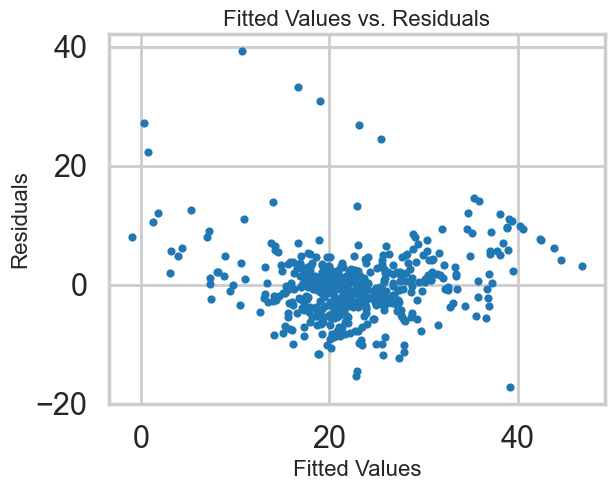

In [50]:
# Your turn. 

# fitted values versus residuals plot (features: 'CRIM', 'RM', 'PTRATIO')
plt.scatter(m.fittedvalues, m.resid, s=15)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs. Residuals')

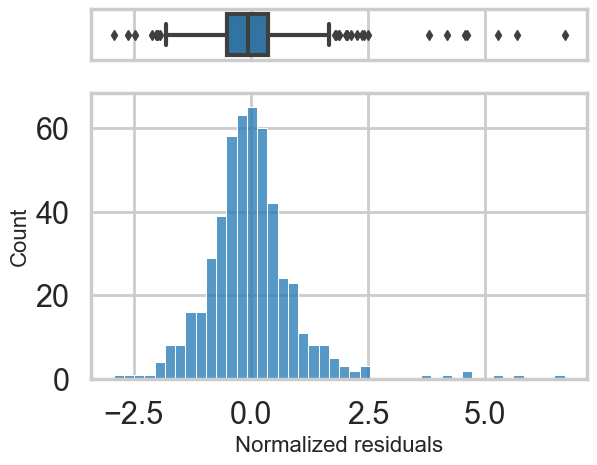

In [51]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(x=m.resid_pearson, ax=ax_box)
sns.histplot(x=m.resid_pearson, ax=ax_hist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.ylabel('Count')
plt.xlabel('Normalized residuals')
plt.show()

Looking at the above histogram and scatterplot, we can definitely see that the residuals have some outstanding outliers (over 3 std. deviations away from the mean), making it skewed. 
* This violates the model assumption that the residuals have a normal distribution. 

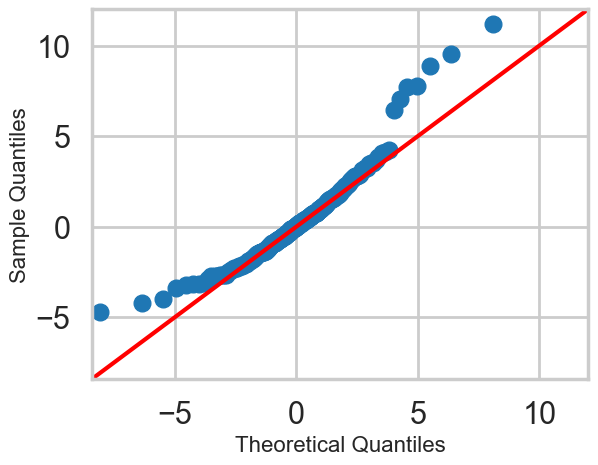

In [52]:
# quantile plot of the residuals (https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html)
# i.e. comparing the residuals' distribution to a normal distribution
fig = sm.qqplot(m.resid, stats.t, fit=True, line="45")
plt.show()

# note: stats.t is similar to a normal distribution (https://www.statology.org/t-distribution-python/)

The above quantile plot of the residuals tells us that the distribution is not normal (since not all the points are along the line $y=x$)

[source](https://www.geeksforgeeks.org/quantile-quantile-plots/)
[quantile definition](https://www.statista.com/statistics-glossary/definition/356/quantile/)

Advantages and disadvantages of the `fitted vs. residual` and `quantile plot` compared to each other?
* using a quantile plot would allow us to compare distributions of 2 different samples of data 
    * or if we compare our residuals to that a normal distribution, we can determine if our residuals are normally dist.
* the fitted vs. residual plot allows us to see the obvious outliers in the data
    * however it does not clearly show whether the residuals are normally distributed

`Identifying outliers:`
* The most obvious outliers are given by the points with $|\text{residual}| > 20$ in the 'Fitted Values vs. Residuals' scatterplot. 
* Using our intuition from exploring this dataset earlier, it is safe to assume they are the points where the 'PRICE'$\approx 50$ and not "in line" with the other predicted values

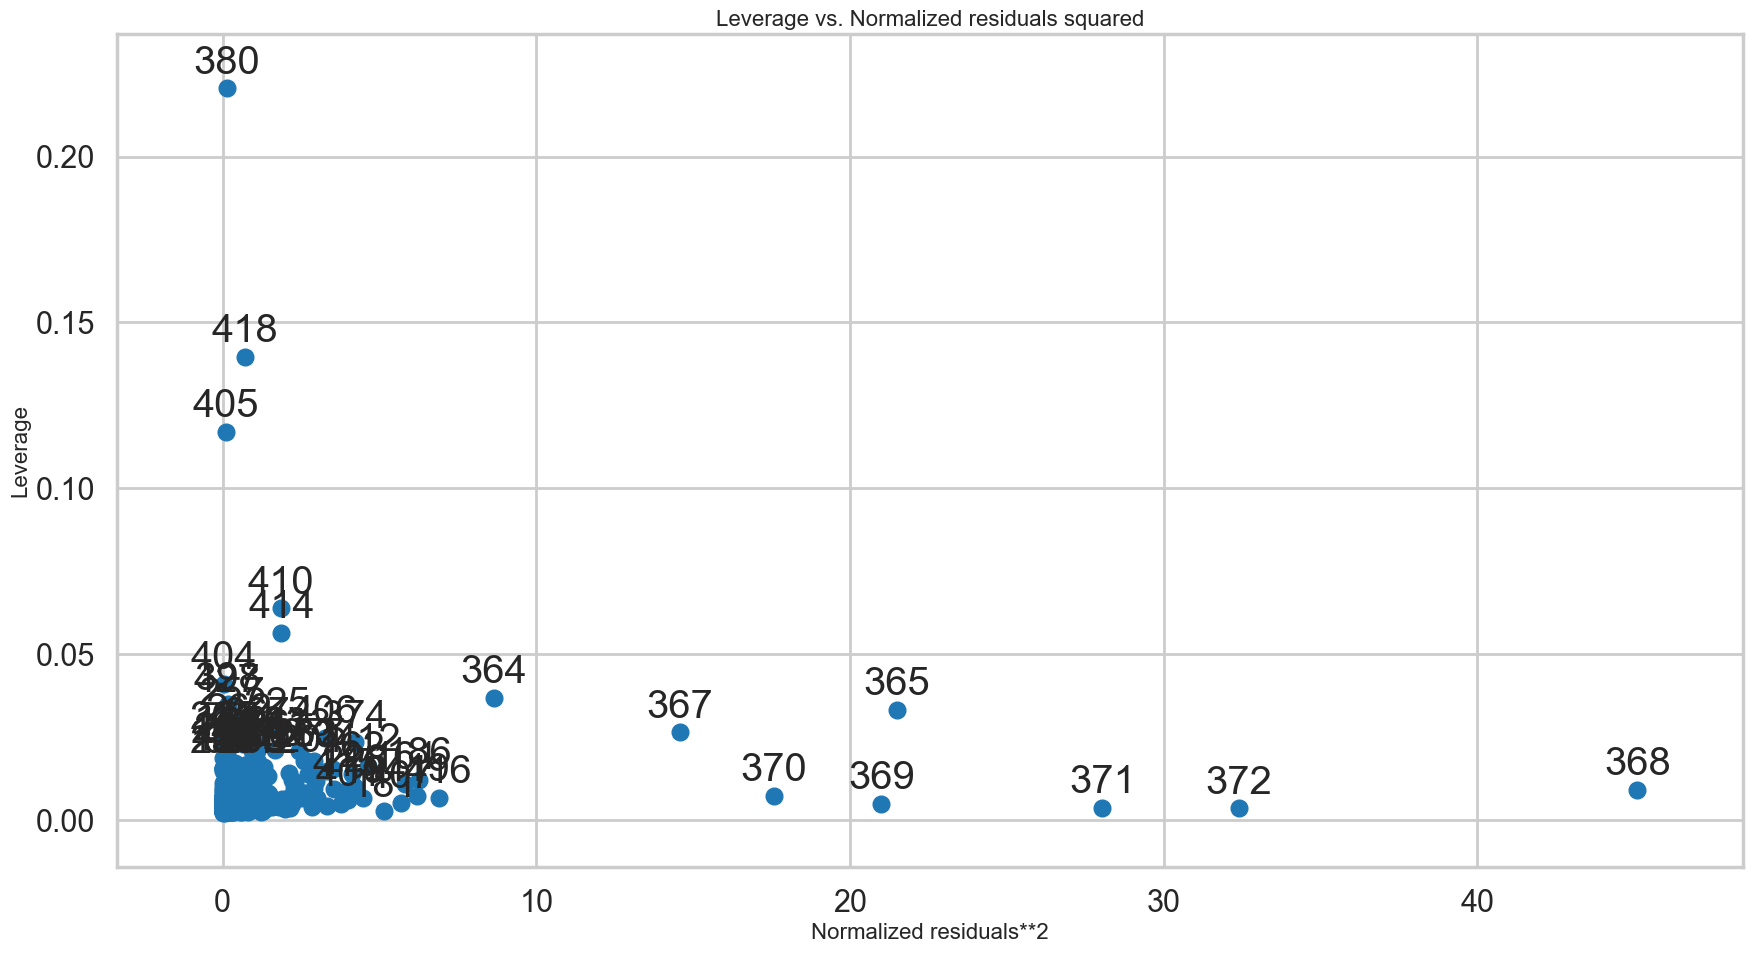

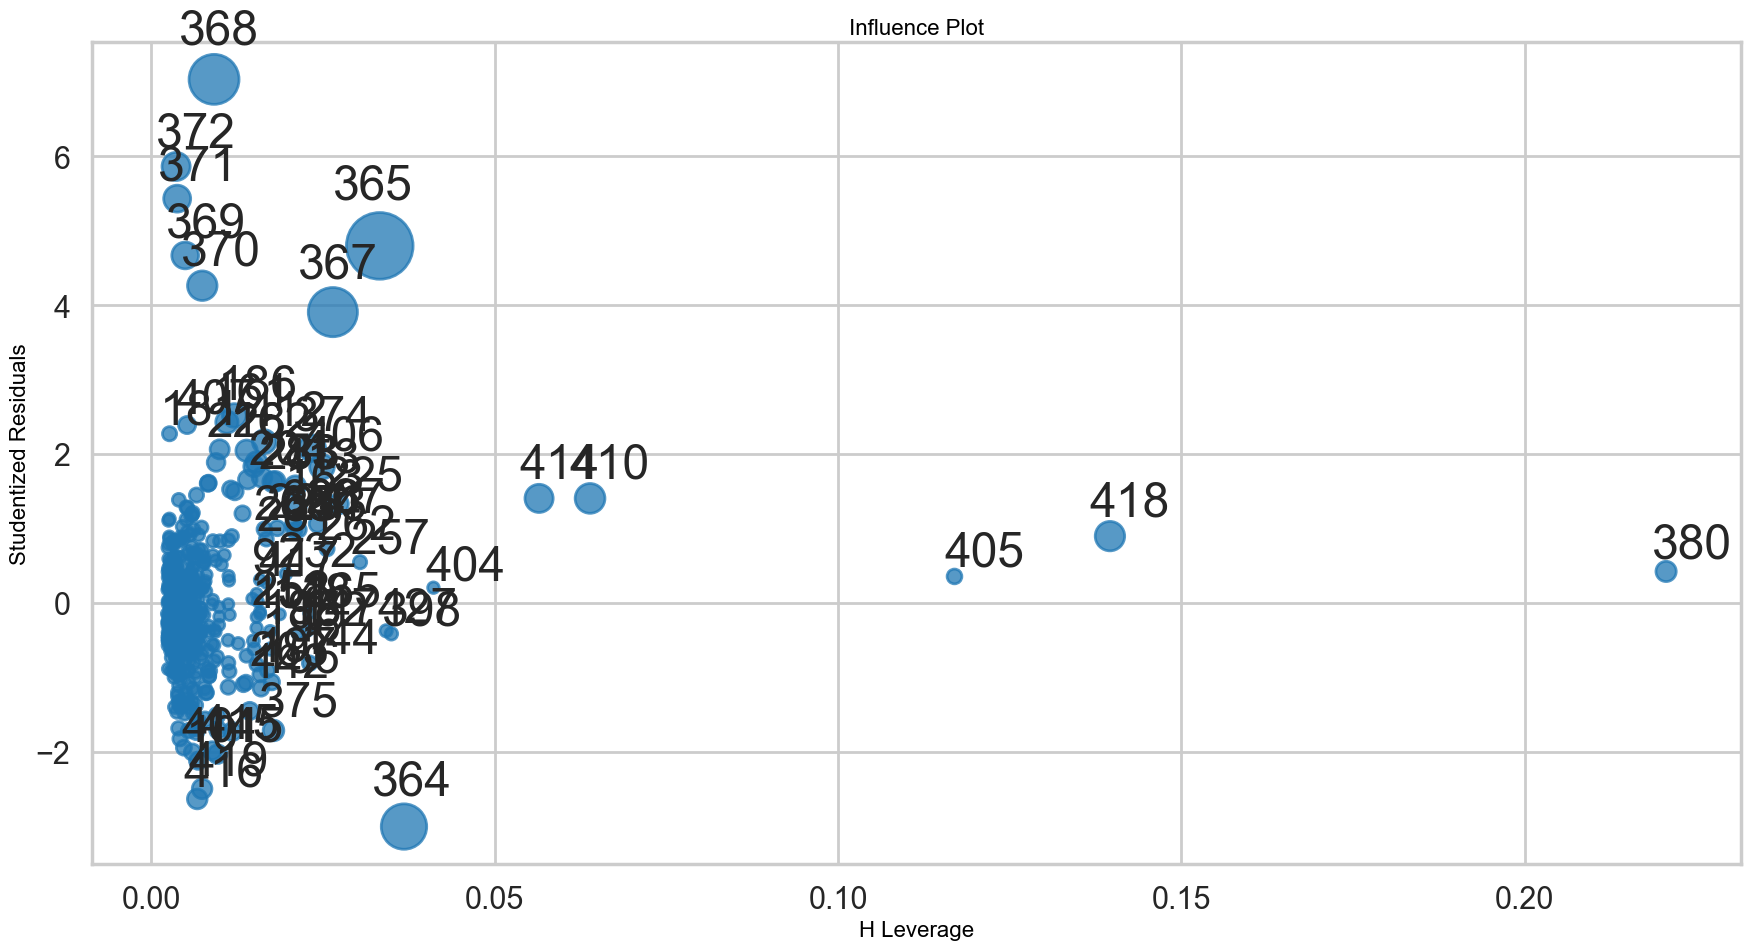

In [53]:
# leverage plot (plot that allows us to identify influential observations in a regression model)
from statsmodels.graphics.regressionplots import *
fig = sm.graphics.plot_leverage_resid2(m)
fig.set_size_inches(18, 10)
fig.tight_layout(pad=1.0)

fig = influence_plot(m)
fig.set_size_inches(18, 10)
fig.tight_layout(pad=1.0)

`Identifying high leverage points in the model:`
* The obvious high leverage points are the points with Leverage > 0.1
    * may want to be wary of the values with large squared-residuals
* the high leverage points may be due to erroneous data or maybe special cases (maybe a famous area in Boston)

* [helpful plot descriptions](https://www.geeksforgeeks.org/residual-leverage-plot-regression-diagnostic/)
* [same dataset used here](https://www.datasklr.com/ols-least-squares-regression/diagnostics-for-leverage-and-influence)

### Remove the outliers and high leverage points and rerun OLS model

[following code from here](https://www.datasklr.com/ols-least-squares-regression/diagnostics-for-leverage-and-influence)
* they removed data points [64, 147, 148, 161, 162, 163,166, 186, 195, 214, 225, 233, 267, 364, 365, 367, 368, 369, 370, 380, 412, 414]

Leverage vs. Studentized Residuals


Text(0, 0.5, 'Studentized Residuals')

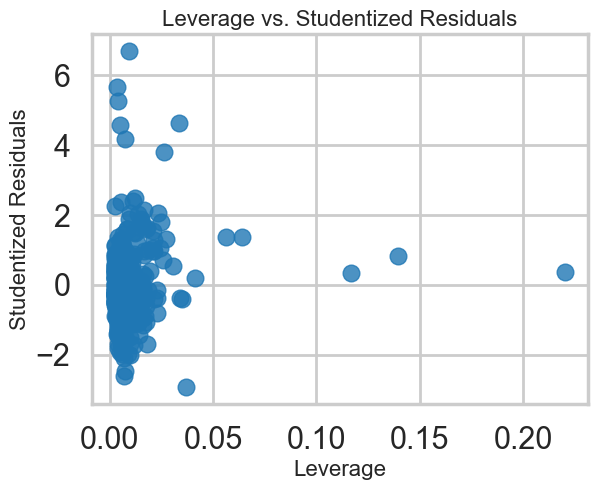

In [54]:
influence = m.get_influence()
inf_sum = influence.summary_frame()
#print(inf_sum.head())

student_resid = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag

print ('Leverage vs. Studentized Residuals')
sns.regplot(x=leverage, y=m.resid_pearson,  fit_reg=False)
plt.title('Leverage vs. Studentized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')

In [55]:
# add student_resid & leverage to the dataframe
bos['student_resid'] = student_resid
bos['leverage'] = leverage
bos.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE,student_resid,leverage
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,4.98,24.0,-0.817584,0.006208


In [56]:
k = int(m.df_model) # number of features used
lev_cutoff = 2*k/N
stud_res_cutoff = 3.0

In [57]:
# Remove the outliers and high leverage points
bos_cut = bos[(bos.student_resid.abs() < stud_res_cutoff) & (bos.leverage < lev_cutoff)]
print('Removed', bos.shape[0]-bos_cut.shape[0],'points')

Removed 71 points


In [58]:
# Rerun OLS with "refined" data
X3 = bos_cut[['CRIM', 'RM', 'PTRATIO']]
X3 = sm.add_constant(X3) 

m3 = sm.OLS(bos_cut.PRICE,X3).fit()

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

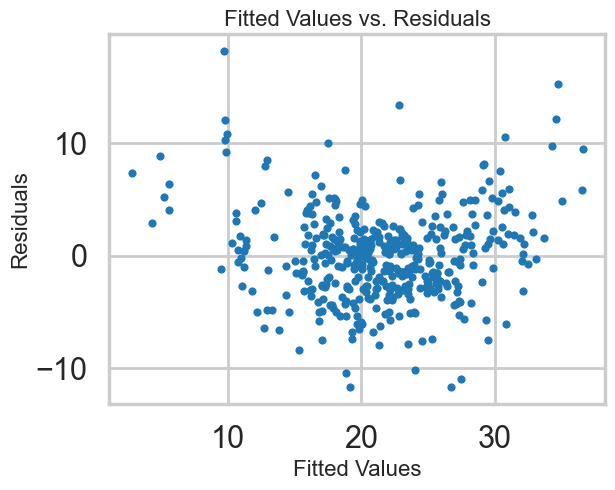

In [59]:
# plots
plt.scatter(m3.fittedvalues, m3.resid, s=15)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs. Residuals')

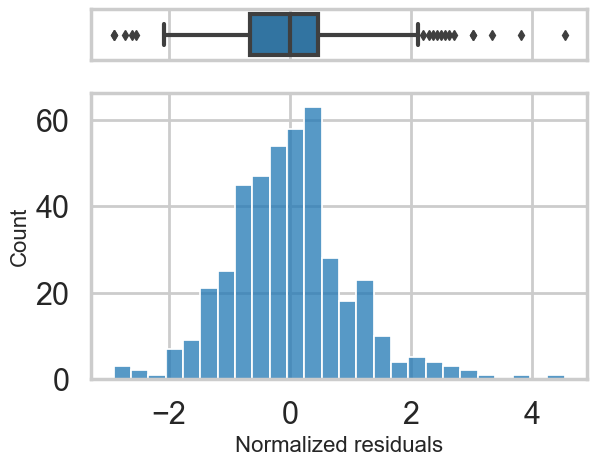

In [60]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(x=m3.resid_pearson, ax=ax_box)
sns.histplot(x=m3.resid_pearson, ax=ax_hist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.ylabel('Count')
plt.xlabel('Normalized residuals')
plt.show()

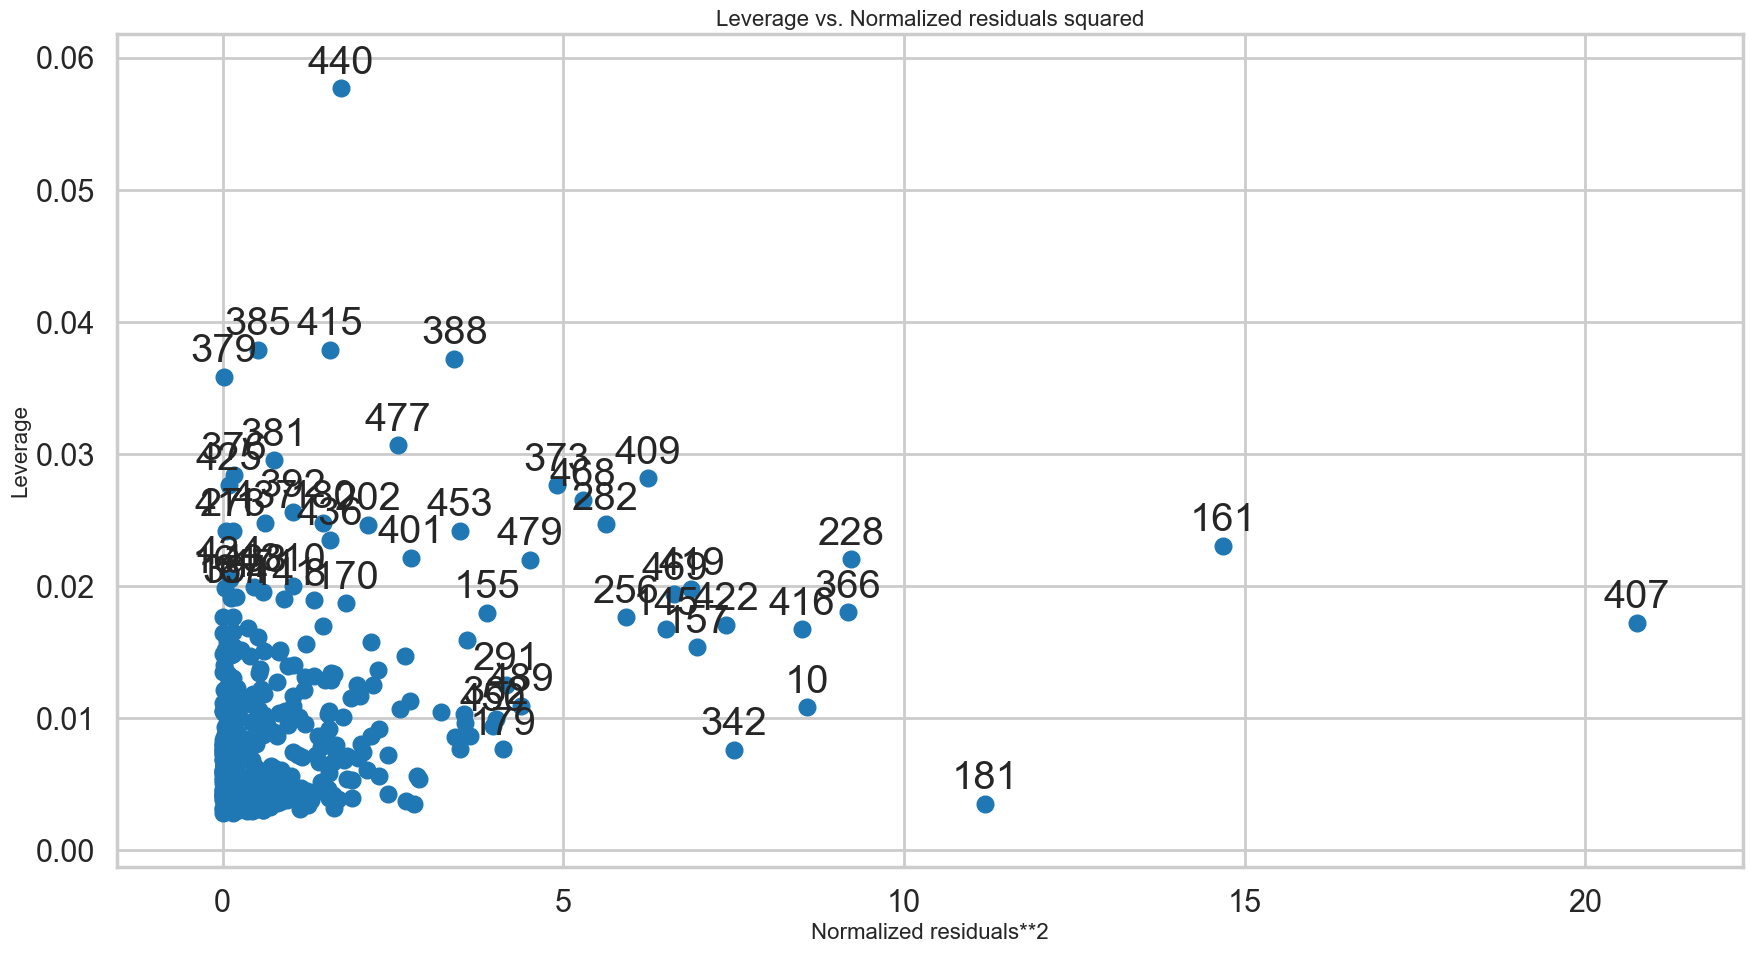

In [61]:
fig = sm.graphics.plot_leverage_resid2(m3)
fig.set_size_inches(18, 10)
fig.tight_layout(pad=1.0)

In [62]:
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     280.6
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          5.95e-101
Time:                        16:41:30   Log-Likelihood:                -1219.6
No. Observations:                 435   AIC:                             2447.
Df Residuals:                     431   BIC:                             2464.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.9458      3.764     -2.111      0.0

In [63]:
# previous summary (outliers included)
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           6.15e-98
Time:                        16:41:30   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3707      4.034     -0.836      0.4

How do the results change?
* It appears the $R^{2}$ increased and the AIC value decreased, which are good improvements
* there are still quite a lot of outliers, so we can probably try to refine the data points more